In [1]:
from diagrams import Diagram, Cluster, Edge
from diagrams.programming.flowchart import Document, MultipleDocuments

with Diagram("Company Detective", show=False, filename="system_diagram"):
    source = Document("Company, product name")

    with Cluster("Reddit"):

        markdowns = source >> Edge(label="Google search") >> MultipleDocuments("URLs") >> Edge(label="PRAW") >> MultipleDocuments("Structured data\n(CommentForest)") >> MultipleDocuments("Markdown format")

        with Cluster("Langchain map-reduce"):
            reddit_summary = markdowns >> Edge(label="Extract quotes, gpt4o-mini") >> MultipleDocuments("Quotes by document") >> Edge(label="Organize, gpt4o-mini") >> Document("Quotes by topic")

    with Cluster("Glassdoor"):
        glassdoor_summary = source >> Edge(label="Google search") >> Document("URL") >> Edge(label="Scrapfly") >> MultipleDocuments("Structured data") >> MultipleDocuments("Markdown format") >> Edge(label="gpt4o-mini") >> Document("Key quotes")

    with Cluster("News"):
        news_summary = source >> Edge(label="Google search") >> MultipleDocuments("URLs") >> Edge(label="newspaper4k") >> MultipleDocuments("Structured data\n(Article text, Author, Date)") >> MultipleDocuments("Markdown format") >> Edge(label="gpt4o-mini") >> Document("Abstractive summary")
    
    with Cluster("Crunchbase"):
        crunchbase_markdown = source >> Edge(label="Google search") >> Document("URL") >> Edge(label="Scrapfly") >> Document("Structured data") >> Document("Markdown format")

    with Cluster("Extra links"):
        links = source >> Edge(label="Google search") >> MultipleDocuments("Structured data\n(URLs, Titles, Snippets)")
        extra_links = links >> MultipleDocuments("Markdown format") >> Edge(label="gpt4o-mini") >> Document("Filtered, organized document")

        apple_reviews = links >> Edge(label="If present", style="dashed") >> MultipleDocuments("Apple app store reviews") >> MultipleDocuments("Markdown format")
        google_reviews = links >> Edge(label="If present", style="dashed") >> MultipleDocuments("Google play store reviews") >> MultipleDocuments("Markdown format")
        steam_reviews = links >> Edge(label="If present", style="dashed") >> MultipleDocuments("Steam reviews") >> MultipleDocuments("Markdown format")

    summary = Document("Summary")

    reddit_summary >> summary
    glassdoor_summary >> summary
    news_summary >> summary
    crunchbase_markdown >> summary
    extra_links >> summary

    apple_reviews >> summary
    google_reviews >> summary
    steam_reviews >> summary

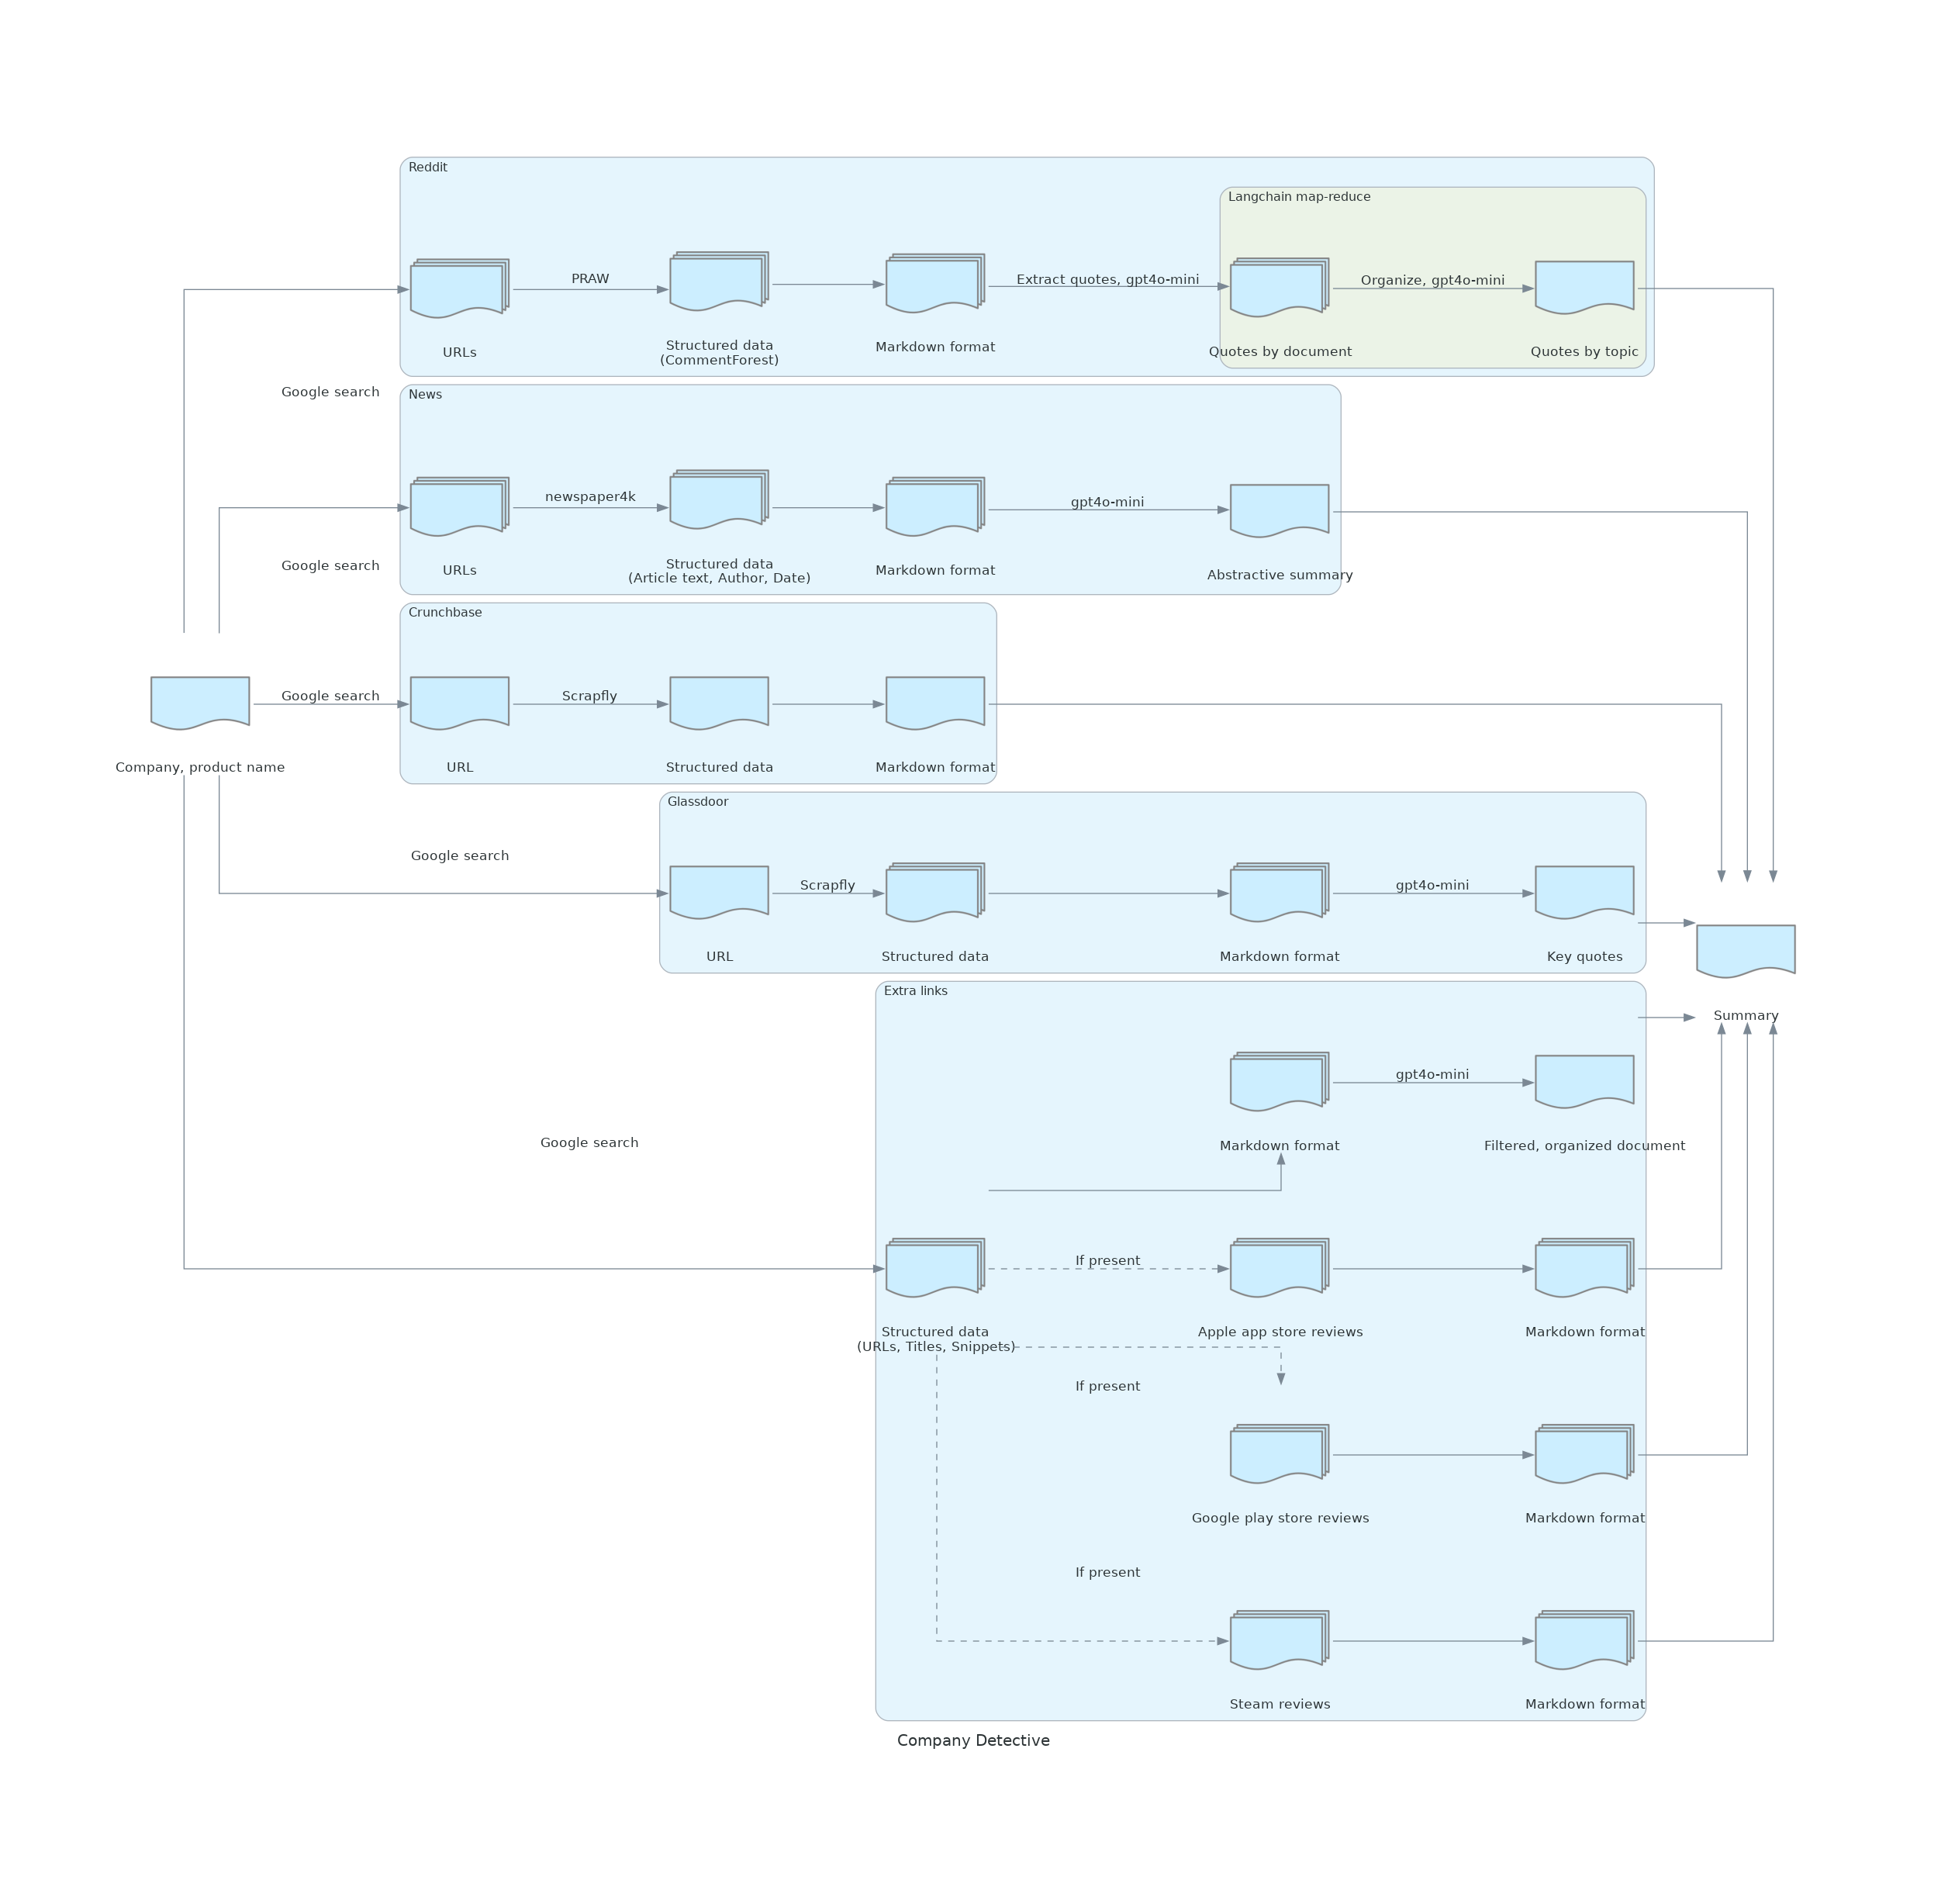

In [2]:
from IPython.display import Image
Image(filename="system_diagram.png")